![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/800px-RMS_Titanic_3.jpg)

# Titanic

### Import libraries

In [309]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import missingno
import re
from sklearn.preprocessing import StandardScaler
from collections import Counter
import matplotlib.pyplot as plt

### Load Data

In [310]:
df = pd.read_csv('Titanic.csv')

In [311]:
df.shape

(891, 12)

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [313]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*fGXgq2wZ8GBmmvn2aHMnnA.png)

### 1. What is the most important factor in determining survival of the Titanic incident?

What data do we need to predict survived?
- Pclass 
- Sex
- Age 
- SibSp
- Parch
- Embarked
- Fare


In [314]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Checking for any duplicates in the dataset.

In [315]:
df.duplicated().any()

False

For future modelling, we need to separate the Dataframe into variables and target.

In [316]:
X_features = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived', 'Cabin'], axis=1)
y_target = df['Survived']

In [317]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


We have 2 missing values in the Embarked column, let's remove them.

In [318]:
X_features = X_features.dropna(subset=['Embarked'])

We need to transform categorical data to numerical.

In [240]:
le = LabelEncoder()
X_features['Embarked'] = le.fit_transform(X_features['Embarked'])
X_features['Sex'] = le.fit_transform(X_features['Sex'])
X_features.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


### Checking for the missing values.

In [241]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


<Axes: >

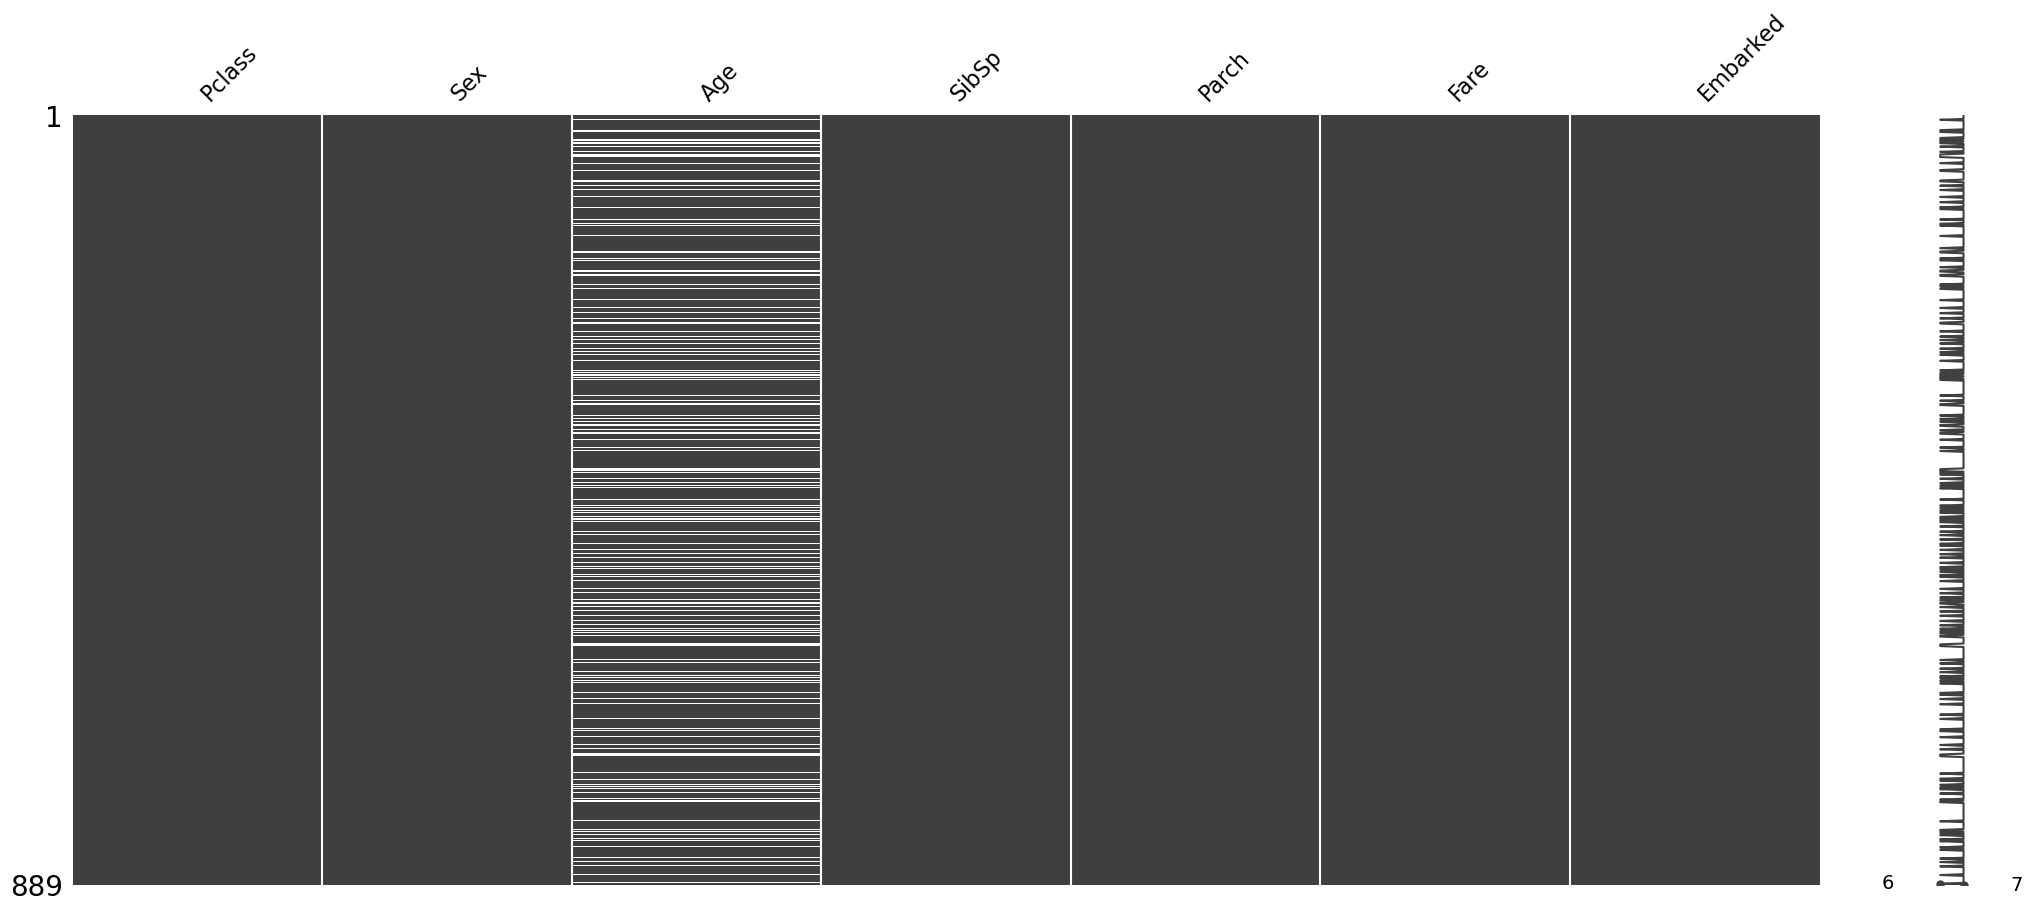

In [242]:
missingno.matrix(X_features)

In [243]:
X_features.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

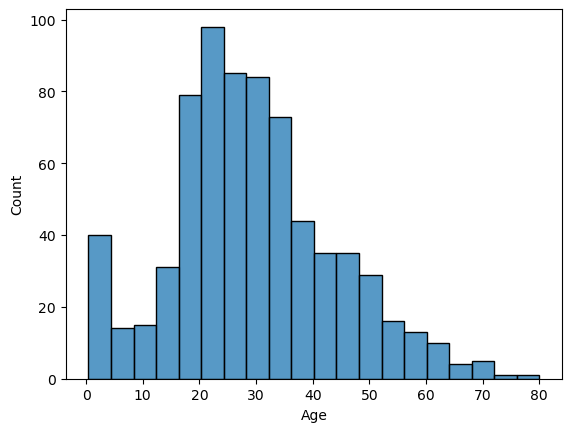

In [244]:
sns.histplot(X_features['Age'])

<Axes: >

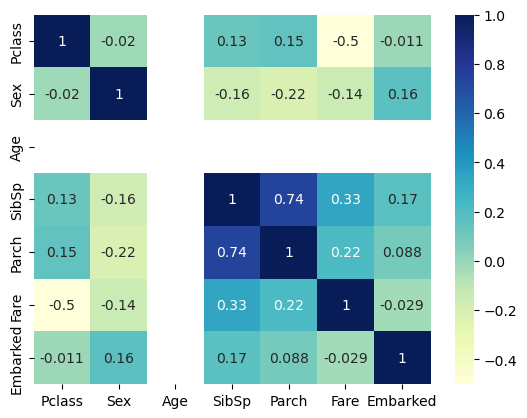

In [245]:
nan_val = X_features[X_features.Age.isna()]
# sns.pairplot(nan_val)
sns.heatmap(nan_val.corr(), annot=True, cmap='YlGnBu')


In this Titanic dataset, column 'Age' Missing Completely At Random Values(MCAR). We can implement the Mean or median or create new observations from column 'Name', we can extract Titles (Mr, Mrs ...) and use them to identify the mean for groups of titles.

### Add one other observation that you have noted in the dataset.

In [246]:
# get the 'Title'
def get_title(name):
 title_search = re.search(' ([A-Za-z]+)\.', name)
 # If the title exists, extract and return it.
 if title_search:
  return title_search.group(1)
 return ""

X_features['Title'] = df['Name'].apply(get_title)

In [247]:
X_features['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [248]:
# Clean the variable Title.
X_features['Title'] = X_features['Title'].replace(['Lady', 'Countess','Capt', 'Col',
  'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'noble')
X_features['Title'] = X_features['Title'].replace('Mlle', 'Miss')
X_features['Title'] = X_features['Title'].replace('Ms', 'Mrs')
X_features['Title'] = X_features['Title'].replace('Mme', 'Mrs')
X_features['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'noble'], dtype=object)

In [249]:
mean_groups = X_features.groupby(['Title'])['Age'].agg(['mean', 'count'])
mean_groups

,mean,count
Title,,
Master,4.574167,36
Miss,21.693878,147
Mr,32.368090,398
Mrs,35.477064,109
noble,45.545455,22


In [250]:
group_means = round(X_features.groupby('Title')['Age'].transform('mean'))
X_features['Age'] = X_features['Age'].fillna(group_means)

In [251]:
X_features.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

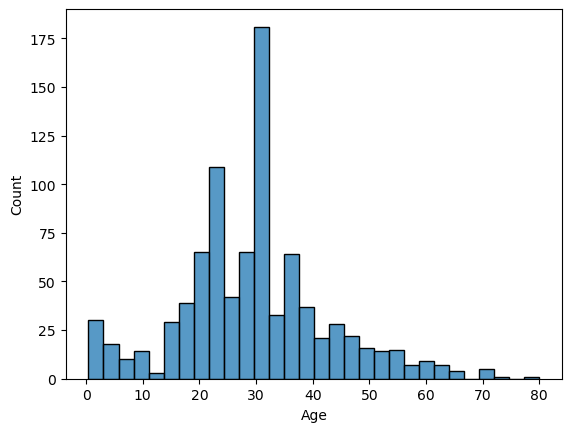

In [252]:
sns.histplot(X_features['Age'])

In [253]:
X_features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,22.0,1,0,7.2500,2,Mr
1,1,0,38.0,1,0,71.2833,0,Mrs
2,3,0,26.0,0,0,7.9250,2,Miss
3,1,0,35.0,1,0,53.1000,2,Mrs
4,3,1,35.0,0,0,8.0500,2,Mr


In [254]:
X_features['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'noble'], dtype=object)

Transforming categorical data to numeric.

In [255]:
X_features['Title'] = le.fit_transform(X_features['Title'])
X_features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,22.0,1,0,7.2500,2,2
1,1,0,38.0,1,0,71.2833,0,3
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,2,2


### Checking for outliers and scaling

<Axes: >

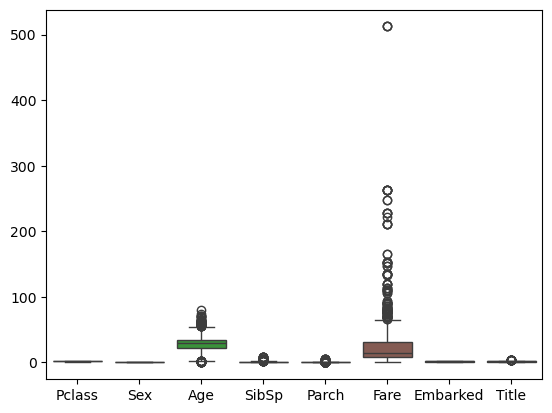

In [256]:
sns.boxplot(X_features)

In [258]:
def detect_outliers(df, n, features):
   
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(X_features, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 25 indices:  [7, 16, 119, 164, 268, 297, 305, 386, 438, 587, 642, 659, 745, 824, 879, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [259]:
print("Before: {} rows".format(len(X_features)))
X_feature = X_features.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(X_features)))

Before: 889 rows
After: 864 rows


I left the remaining outliers so they don't damage our model. They are representations of a real-world scenario.

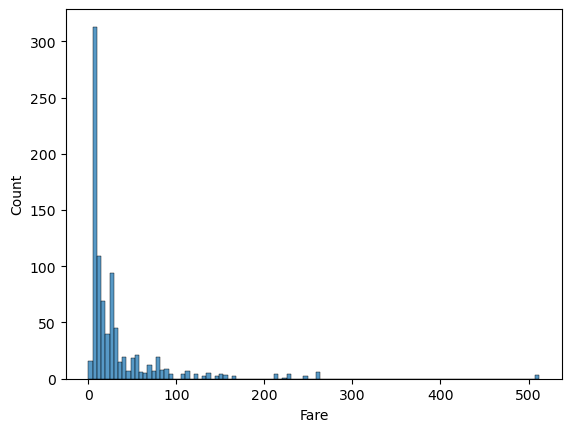

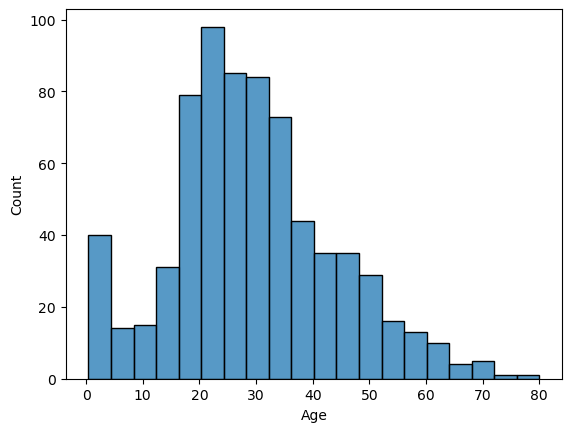

In [321]:
sns.histplot(X_features['Fare'])
plt.show()
sns.histplot(X_features['Age'])
plt.show()

We see that 'Age' have Gauss distribution and Fare has Skew distribution. We will use Standardisation (Z-score normalisation) for Age and Min max scaling for Fare

In [322]:
scaler = StandardScaler()
X_features.Age = scaler.fit_transform(X_features.Age.values.reshape(-1,1))

<Axes: xlabel='Fare', ylabel='Count'>

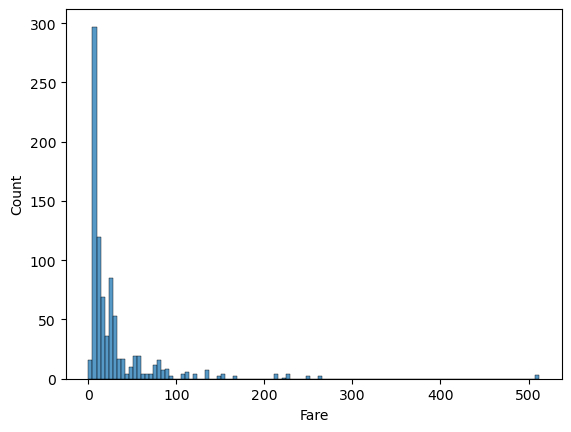

In [276]:
sns.histplot(X_features['Fare'])

Performing a log-transformation to scale the fares such that they look somehow normally distributed.

In [277]:
X_features.Fare = X_features.Fare.apply(lambda l: np.log(l+1))

<Axes: xlabel='Fare', ylabel='Count'>

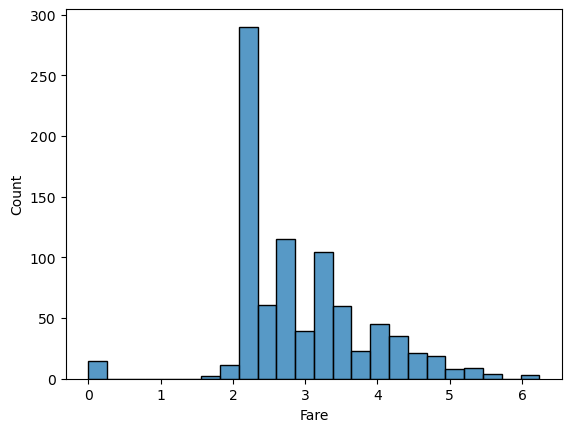

In [278]:
sns.histplot(X_features['Fare'])

In [279]:
X_features.Fare = scaler.fit_transform(X_features.Fare.values.reshape(-1,1))

<Axes: >

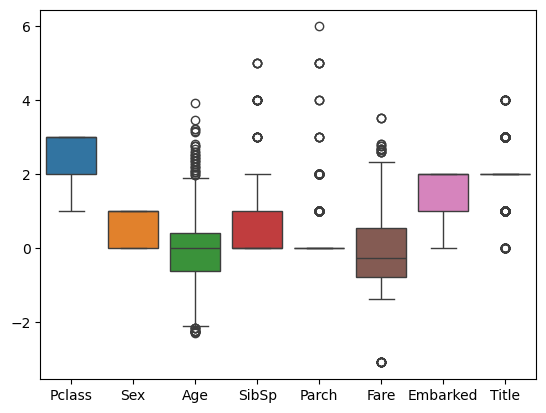

In [282]:
sns.boxplot(X_features)

### In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?

In [290]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Text(0, 0.5, 'Number of people')

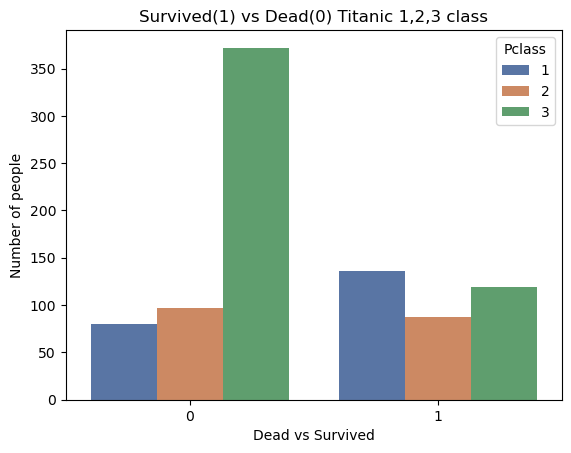

In [300]:
sns.countplot(data=df, x='Survived',hue='Pclass',palette='deep')
plt.title('Survived(1) vs Dead(0) Titanic 1,2,3 class')
plt.xlabel("Dead vs Survived")
plt.ylabel("Number of people")

#### In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?

Yes. Number 1 represents people who survived, we can see that from 1st class survived more people and where the dead we can see that fewer people died from 1st class.

### “Women and children first”. Was this the case?

To see if children have survived more than other people we need to convert the Year column to the groups.

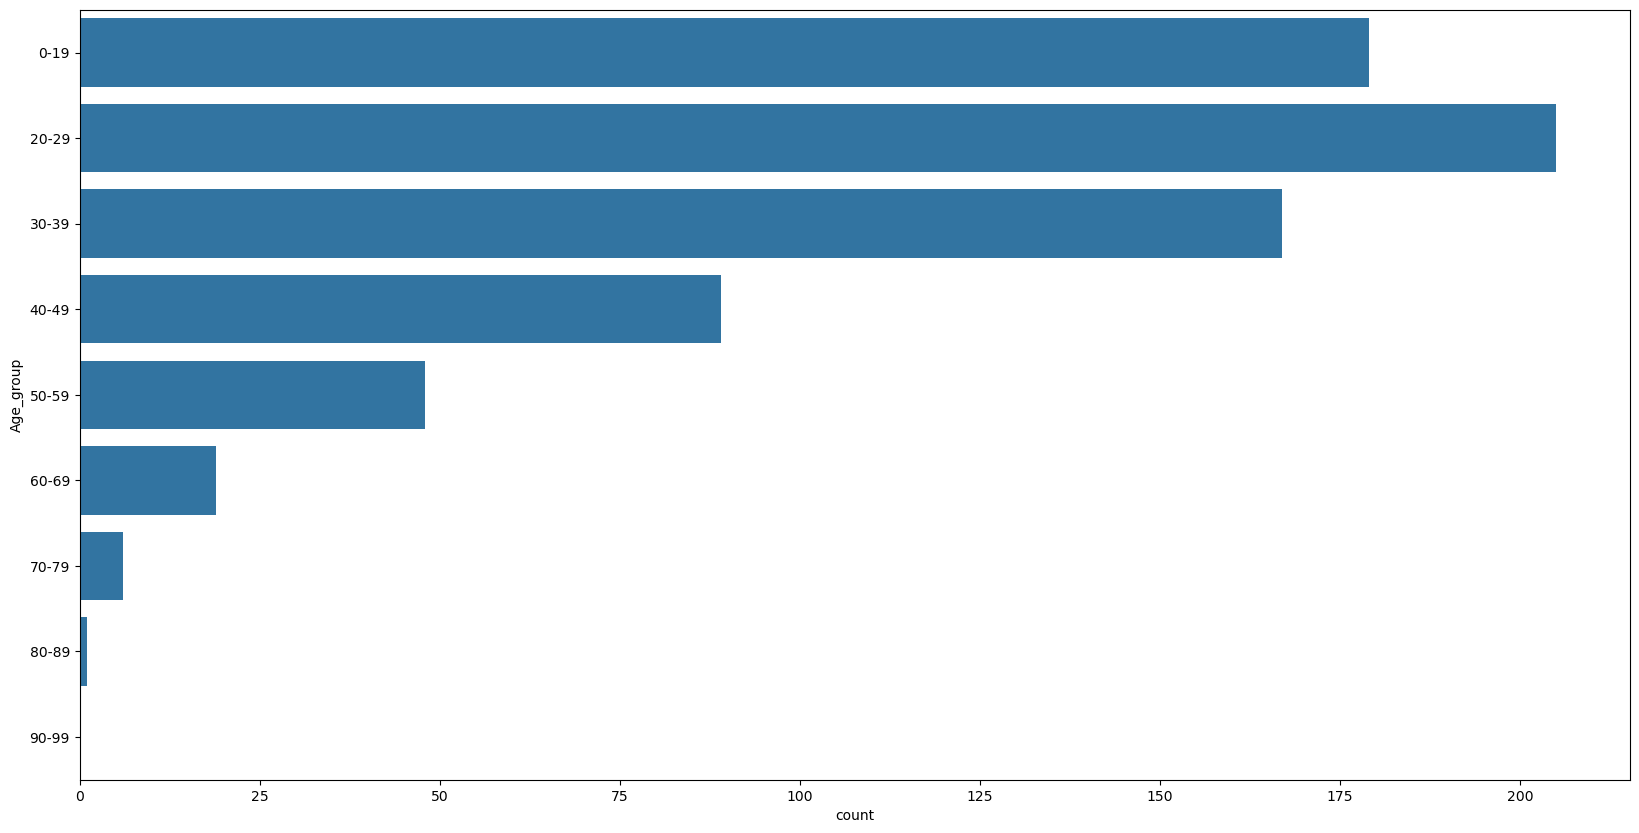

In [305]:
df['Age_group'] = pd.cut(df['Age'], [0,20,29,39,49,59,69,79,89,99], 
                   labels=['0-19','20-29','30-39','40-49','50-59','60-69','70-79',
                           '80-89','90-99'])

fig = plt.figure(figsize=(20,10))
sns.countplot(y=df['Age_group'], data=df);

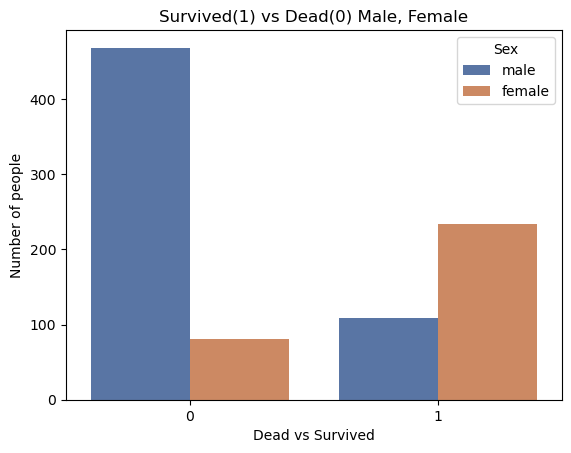

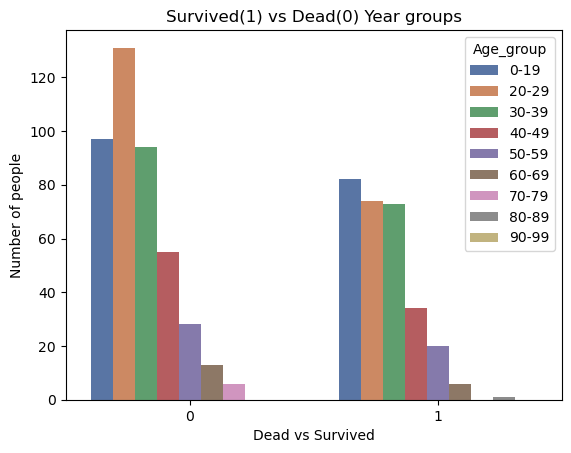

In [308]:
sns.countplot(data=df, x='Survived',hue='Sex',palette='deep')
plt.title('Survived(1) vs Dead(0) Male, Female')
plt.xlabel("Dead vs Survived")
plt.ylabel("Number of people")
plt.show()

sns.countplot(data=df, x='Survived',hue='Age_group',palette='deep')
plt.title('Survived(1) vs Dead(0) Year groups')
plt.xlabel("Dead vs Survived")
plt.ylabel("Number of people")
plt.show()

#### “Women and children first”. Was this the case?

- In the first plot we see that survived more women than men and died more men than women.
- In the second plot we see that more people survived from age 0 - 19 after going 20 - 29 which means that the prase '“Women and children first”. Was this the case?' is right!